In [36]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
df = pd.read_csv('car_sales_data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [20]:
# Check how many categorical features are available in dataset

# Print unique categroircal values

print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())


# Show only numeric columns
#    df.select_dtypes(include=np.number).columns
# Show only non-numeric columns
#    df.select_dtypes(exclude=np.number).columns

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [22]:
# Check missing or null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

All zeros, so we can conclude there is no null values in data

In [23]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
print(df.columns)

# Excluding the Car_Name feature in the final dataset because, the dependent feature 'Selling_Price' never depends on name of the car

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset.head()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
final_dataset['Current_Year'] = dt.datetime.today().year
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [44]:
# using Year feature derive a new feature called 'Car_Age'

final_dataset['Car_Age'] = final_dataset['Current_Year'] - final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [45]:
final_dataset.drop(['Year', 'Current_Year'], axis=1, inplace=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [46]:
# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

# Convert categorical features to 'one hot encoded'
final_dataset = pd.get_dummies(final_dataset, drop_first=True) 
# drop_first = True to avoid/prevent 'dummy variable trap'

In [47]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [48]:
# find the correlation in the dataset
# dataframe.corr()   --> Describes how one feature is correlated to other feature

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [50]:
# Plot the correlation using seaborn library
import seaborn as sns


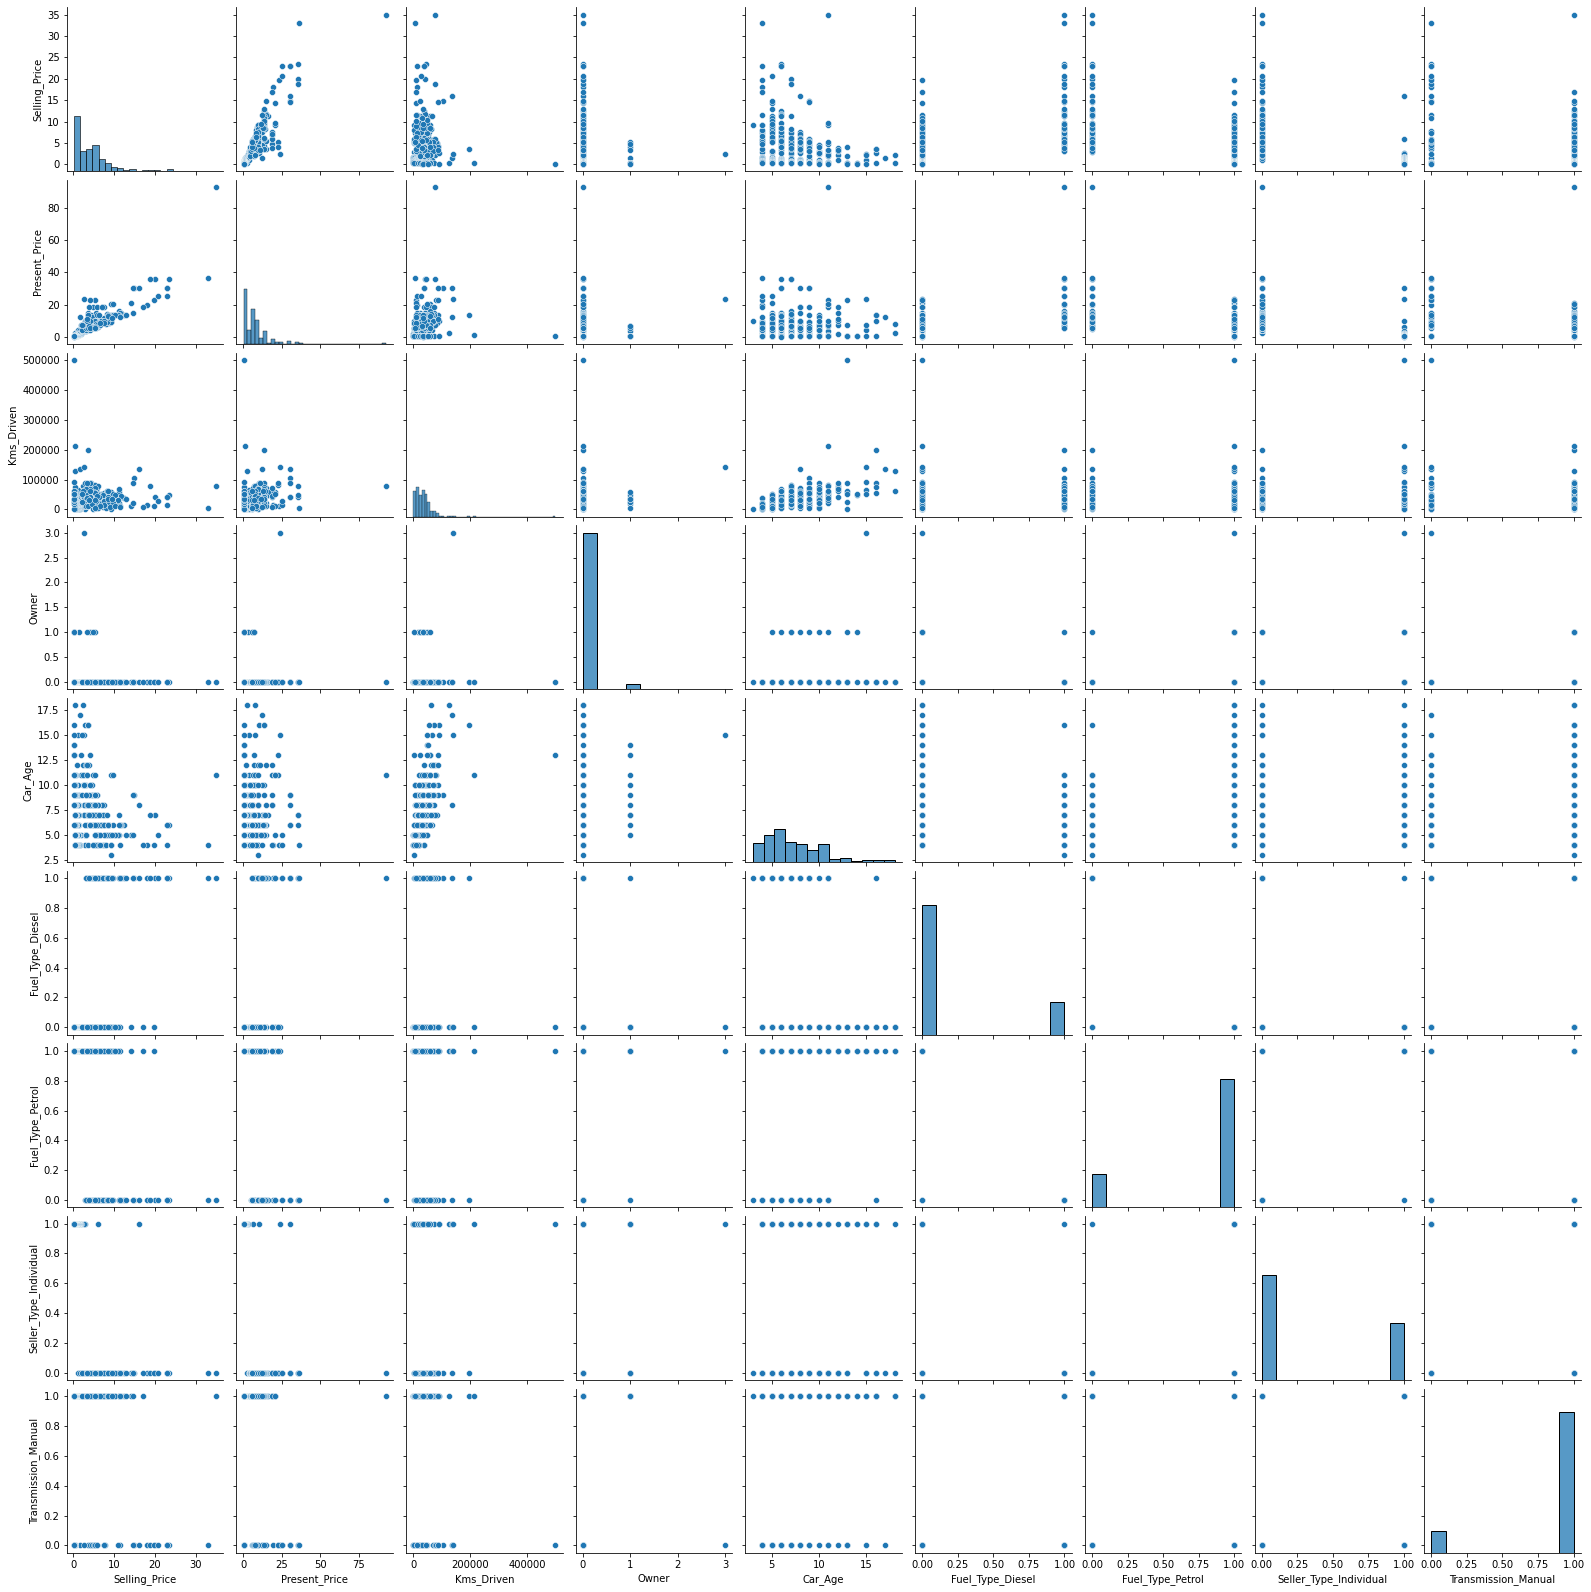

In [51]:
sns.pairplot(final_dataset)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

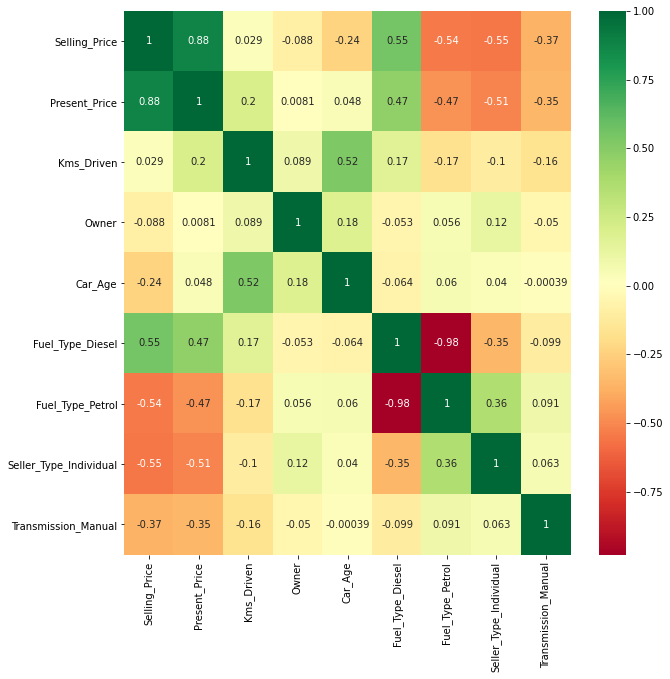

In [64]:
# plot the correlation of features in heat map for better insights

corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# plot heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

For the better models, the **highly correlated features can be dropped**, as the behaviour of the highly correated feature and dependent feature is same. Ideally the feature with correlation value **greater than 0.8** can be ignored for model development.

In [66]:
# Selling_Price is Dependent feature, rest of all independent features.
# Set independent and dependent features

X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [70]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [71]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [76]:
## Feature Importance

print(model.feature_importances_)

[4.36323529e-01 4.13986840e-02 2.96242187e-04 8.13368084e-02
 1.84110366e-01 1.79980966e-02 1.25323856e-01 1.13212418e-01]


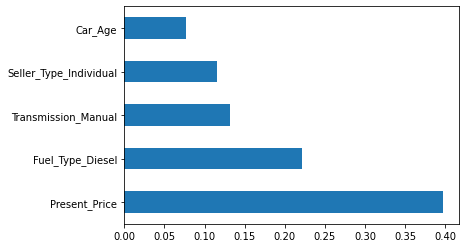

In [78]:
# plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [79]:
# Perform Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [80]:
X_train.shape

(240, 8)

In [81]:
# if we are using random forest, need not to use scaling because random fores uses Decision Tree

from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [84]:
## Hyper parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features  = ['auto', 'sqrt']

# Max number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Min number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Min number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Performing hyper perameters tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [85]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
# use the random grid to search for best hyper parameters
# first create the base model to tune

rf = RandomForestRegressor()


In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, verbose=2, n_jobs=1 )

In [87]:
rf_random.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
predictions = rf_random.predict(X_test)

In [89]:
predictions

array([ 1.0635,  4.594 ,  0.3457, 16.5239,  6.624 , 22.0594,  2.671 ,
        0.7111,  5.1768,  4.661 ,  0.4031,  3.3755,  3.6095,  2.9685,
        0.4851,  1.4808,  8.424 , 11.8516,  2.7351,  3.6985,  0.5257,
        4.3241, 14.3706,  0.3009,  5.239 ,  5.8695,  0.3139,  3.1455,
        2.8935,  5.3716,  4.675 ,  6.6034,  5.183 ,  5.2755,  3.0845,
        0.4558,  3.3489,  0.2927,  2.6142,  1.533 ,  2.7245,  8.57  ,
        6.9754,  5.0775,  1.2581,  1.561 ,  0.5214,  4.5025,  0.5025,
        5.92  ,  0.5219,  1.1205,  2.5646,  8.6645,  3.5531,  0.4928,
        0.5278,  0.4302,  2.7215,  6.1385,  1.1728])

d:\programdata\anaconda3\envs\usedcarpriceprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

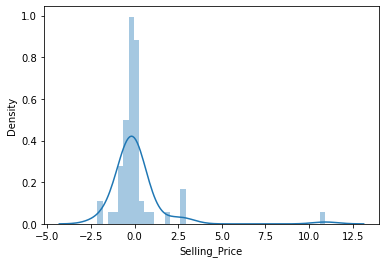

In [90]:
sns.distplot(y_test-predictions)

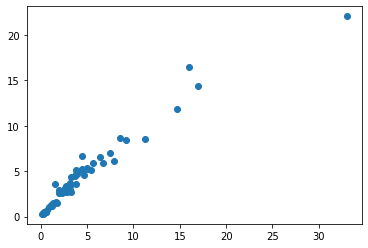

In [91]:
plt.scatter(y_test, predictions)

In [92]:
import pickle

file = open('random_forest_regression_car_price_prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)